In [1]:
#Michael Lust
#801094861
#Real Time AI (4106)
#Febuary 14, 2022

In [2]:
from torchvision import models, datasets, transforms
import imageio as img
import os
import numpy as np
import torch
import torch.nn as nn

In [3]:
#Problem 1 Using Tensor and .mean() method on RGB pictures

In [4]:
#Problem 1 part a

In [5]:
#Loading a picutre with imageio as img and looking at the pixel shape
picture_array = img.imread('Photos/Packet.jpg')
picture_array.shape

(4000, 3000, 3)

In [6]:
#Problem 1 part b

In [7]:
#picture = torch.from_numpy(picture_array) 
#ValueError: At least one stride in the given numpy array is negative, 
#and tensors with negative strides are not currently supported. 
#(You can probably work around this by making a copy of your array  with array.copy().) 


picture = torch.from_numpy(np.flip(picture_array,axis=0).copy())
out = picture.permute(2,0,1)

In [8]:
#3 photos per batch
batch_size = 3 
#We have a batch size of 3 and the pictures are all 4000 H, 3000 W pixels
batch = torch.zeros(batch_size, 3, 4000, 3000, dtype=torch.uint8) 

In [9]:
#Used the enumerate method to load all .jpg files into a tensor from our Photo's directory to keep track of # of iterations.
picture_directory = 'Photos'
filenames = ['Raycon.jpg', 'Box.jpg', 'Packet.jpg']
for i, filename in enumerate(filenames):
    picture_array = img.imread(os.path.join(picture_directory, filename))
    picture_t = torch.from_numpy(np.flip(picture_array,axis=0).copy())
    picture_t = picture_t.permute(2,0,1)
    picture_t = picture_t[:3]
    batch[i] = picture_t 
    print(batch[i])

tensor([[[198, 202, 203,  ..., 179, 179, 180],
         [201, 203, 203,  ..., 180, 179, 179],
         [203, 203, 202,  ..., 181, 179, 179],
         ...,
         [226, 226, 226,  ..., 223, 222, 222],
         [226, 227, 227,  ..., 223, 222, 221],
         [226, 227, 228,  ..., 223, 222, 221]],

        [[174, 178, 179,  ..., 147, 147, 148],
         [177, 179, 179,  ..., 148, 147, 147],
         [179, 179, 178,  ..., 149, 147, 147],
         ...,
         [198, 200, 200,  ..., 189, 188, 188],
         [200, 201, 201,  ..., 189, 188, 187],
         [200, 201, 202,  ..., 189, 188, 187]],

        [[172, 176, 177,  ..., 148, 148, 149],
         [175, 177, 177,  ..., 149, 148, 148],
         [177, 177, 176,  ..., 150, 148, 148],
         ...,
         [184, 185, 185,  ..., 187, 186, 186],
         [185, 186, 186,  ..., 187, 186, 185],
         [185, 186, 187,  ..., 187, 186, 185]]], dtype=torch.uint8)
tensor([[[199, 200, 200,  ..., 173, 173, 173],
         [199, 200, 200,  ..., 172, 172,

In [10]:
#Problem 1 part c 

In [11]:
#mean(): input dtype should be either floating point or complex dtypes.
batch_norm = batch.float()
batch_mean = batch.float()
#Normalizing the data by divide the values of the pixels by 255 (the maximum representable number in 8-bit unsigned)
batch_norm /= 255.0
batch_mean /= 255.0
batch_norm

tensor([[[[0.7765, 0.7922, 0.7961,  ..., 0.7020, 0.7020, 0.7059],
          [0.7882, 0.7961, 0.7961,  ..., 0.7059, 0.7020, 0.7020],
          [0.7961, 0.7961, 0.7922,  ..., 0.7098, 0.7020, 0.7020],
          ...,
          [0.8863, 0.8863, 0.8863,  ..., 0.8745, 0.8706, 0.8706],
          [0.8863, 0.8902, 0.8902,  ..., 0.8745, 0.8706, 0.8667],
          [0.8863, 0.8902, 0.8941,  ..., 0.8745, 0.8706, 0.8667]],

         [[0.6824, 0.6980, 0.7020,  ..., 0.5765, 0.5765, 0.5804],
          [0.6941, 0.7020, 0.7020,  ..., 0.5804, 0.5765, 0.5765],
          [0.7020, 0.7020, 0.6980,  ..., 0.5843, 0.5765, 0.5765],
          ...,
          [0.7765, 0.7843, 0.7843,  ..., 0.7412, 0.7373, 0.7373],
          [0.7843, 0.7882, 0.7882,  ..., 0.7412, 0.7373, 0.7333],
          [0.7843, 0.7882, 0.7922,  ..., 0.7412, 0.7373, 0.7333]],

         [[0.6745, 0.6902, 0.6941,  ..., 0.5804, 0.5804, 0.5843],
          [0.6863, 0.6941, 0.6941,  ..., 0.5843, 0.5804, 0.5804],
          [0.6941, 0.6941, 0.6902,  ..., 0

In [12]:
#Using standard deviation method to normalize the data from -1 to 1 for better neural network performance.
n_channels_norm = batch_norm.shape[1]
n_channels_mean = batch_mean.shape[1]
#Computing just the mean of each channel of my images.
for c in range(n_channels_norm):
    mean = torch.mean(batch_norm[:, c])
    std = torch.std(batch_norm[:, c])
    batch_norm[:, c] = (batch_norm[:, c] - mean) / std
    print(batch_norm[:, c])
    

tensor([[[ 0.5197,  0.5842,  0.6003,  ...,  0.2133,  0.2133,  0.2295],
         [ 0.5681,  0.6003,  0.6003,  ...,  0.2295,  0.2133,  0.2133],
         [ 0.6003,  0.6003,  0.5842,  ...,  0.2456,  0.2133,  0.2133],
         ...,
         [ 0.9712,  0.9712,  0.9712,  ...,  0.9228,  0.9067,  0.9067],
         [ 0.9712,  0.9873,  0.9873,  ...,  0.9228,  0.9067,  0.8905],
         [ 0.9712,  0.9873,  1.0034,  ...,  0.9228,  0.9067,  0.8905]],

        [[ 0.5358,  0.5519,  0.5519,  ...,  0.1166,  0.1166,  0.1166],
         [ 0.5358,  0.5519,  0.5519,  ...,  0.1005,  0.1005,  0.1005],
         [ 0.5358,  0.5519,  0.5519,  ...,  0.1166,  0.1166,  0.1166],
         ...,
         [ 0.6164,  0.6326,  0.6326,  ...,  0.3746,  0.3746,  0.3585],
         [ 0.6164,  0.6164,  0.6326,  ...,  0.3746,  0.3585,  0.3585],
         [ 0.6003,  0.6164,  0.6326,  ...,  0.3746,  0.3585,  0.3423]],

        [[ 0.7293,  0.6971,  0.6648,  ...,  0.6648,  0.6971,  0.6809],
         [ 0.7132,  0.6809,  0.6648,  ...,  0

In [96]:
#Calculating just the mean or abunce of Red in channel 1, Blue in channel 2, and Green in channel 3
for c in range(n_channels_mean):
    mean = torch.mean(batch_mean[:, c])
    print('Channel Averages for picture', mean)   

Channel Averages for picture tensor(0.6501)
Channel Averages for picture tensor(0.4847)
Channel Averages for picture tensor(0.4990)


In [14]:
#Problem 2 Changing temperature prediction model example from lecture 5 to an non-linear model to compare

In [15]:
#Recreating the temperature prediction model 

In [16]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [17]:
def model(t_u, w, b):
    equ = w * t_u + b 
    return equ

In [18]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [19]:
w = torch.ones(()) #initial W is 1
b = torch.zeros(()) #initial b is 0
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [20]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [21]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - 
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w 

tensor(4517.2974)

In [22]:
a = 1e-2     #means 0.01 is the learning rate or the changing rate for our parameters.
w = w - a * loss_rate_of_change_w
w

tensor(-44.1730)

In [23]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
                         loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - a * loss_rate_of_change_b
b

tensor(46.)

In [24]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [25]:
def dmodel_dw(t_u, w, b):
    return t_u

In [26]:
def dmodel_db(t_u, w, b):
    return 1.0

In [27]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [28]:
#Modified training loop to return Epoch and Cost Values to graph
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    loss_arr = []
    n_epochs_arr = []
    
    for epoch in range(1, n_epochs + 1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
        loss_arr.append([loss])
        n_epochs_arr.append([epoch])
        
    return params, loss_arr, n_epochs_arr

In [29]:
#Creating the training loop for temperature prediction
#Normalizing the inputs between -1 to 1.
t_un = 0.1 * t_u

#Training with 5000 epochs and learning rate at 1e-1
training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 1324.854980
Epoch 3, Loss 33268.753906
Epoch 4, Loss 852660.187500
Epoch 5, Loss 21870290.000000
Epoch 6, Loss 560978048.000000
Epoch 7, Loss 14389238784.000000
Epoch 8, Loss 369087709184.000000
Epoch 9, Loss 9467200536576.000000
Epoch 10, Loss 242836209401856.000000
Epoch 11, Loss 6228809607020544.000000
Epoch 12, Loss 159770653107421184.000000
Epoch 13, Loss 4098160212186234880.000000
Epoch 14, Loss 105118888338361679872.000000
Epoch 15, Loss 2696328177854806228992.000000
Epoch 16, Loss 69161558801146965917696.000000
Epoch 17, Loss 1774012424814353813864448.000000
Epoch 18, Loss 45503893325448584349351936.000000
Epoch 19, Loss 1167186962094856930970304512.000000
Epoch 20, Loss 29938663049887937635513532416.000000
Epoch 21, Loss 767934765829969455328738148352.000000
Epoch 22, Loss 19697725929179070784521531031552.000000
Epoch 23, Loss 505251957864531869030255977037824.000000
Epoch 24, Loss 12959848194354010423046493404397568.000000
Epoch 25, Loss 

(tensor([nan, nan]),
 [[tensor(80.3643)],
  [tensor(1324.8550)],
  [tensor(33268.7539)],
  [tensor(852660.1875)],
  [tensor(21870290.)],
  [tensor(5.6098e+08)],
  [tensor(1.4389e+10)],
  [tensor(3.6909e+11)],
  [tensor(9.4672e+12)],
  [tensor(2.4284e+14)],
  [tensor(6.2288e+15)],
  [tensor(1.5977e+17)],
  [tensor(4.0982e+18)],
  [tensor(1.0512e+20)],
  [tensor(2.6963e+21)],
  [tensor(6.9162e+22)],
  [tensor(1.7740e+24)],
  [tensor(4.5504e+25)],
  [tensor(1.1672e+27)],
  [tensor(2.9939e+28)],
  [tensor(7.6793e+29)],
  [tensor(1.9698e+31)],
  [tensor(5.0525e+32)],
  [tensor(1.2960e+34)],
  [tensor(3.3242e+35)],
  [tensor(8.5268e+36)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  

In [30]:
#Training with 5000 epochs and learning rate at 1e-2
params, loss_arr, n_epochs_arr = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

In [31]:
#Training with 5000 epochs and learning rate at 1e-3
training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 74.413010
Epoch 3, Loss 69.160568
Epoch 4, Loss 64.524818
Epoch 5, Loss 60.433224
Epoch 6, Loss 56.821793
Epoch 7, Loss 53.634056
Epoch 8, Loss 50.820156
Epoch 9, Loss 48.336143
Epoch 10, Loss 46.143223
Epoch 11, Loss 44.207150
Epoch 12, Loss 42.497715
Epoch 13, Loss 40.988270
Epoch 14, Loss 39.655285
Epoch 15, Loss 38.478008
Epoch 16, Loss 37.438126
Epoch 17, Loss 36.519493
Epoch 18, Loss 35.707829
Epoch 19, Loss 34.990566
Epoch 20, Loss 34.356586
Epoch 21, Loss 33.796120
Epoch 22, Loss 33.300499
Epoch 23, Loss 32.862114
Epoch 24, Loss 32.474216
Epoch 25, Loss 32.130878
Epoch 26, Loss 31.826860
Epoch 27, Loss 31.557531
Epoch 28, Loss 31.318819
Epoch 29, Loss 31.107122
Epoch 30, Loss 30.919256
Epoch 31, Loss 30.752424
Epoch 32, Loss 30.604156
Epoch 33, Loss 30.472261
Epoch 34, Loss 30.354820
Epoch 35, Loss 30.250134
Epoch 36, Loss 30.156694
Epoch 37, Loss 30.073187
Epoch 38, Loss 29.998436
Epoch 39, Loss 29.931427
Epoch 40, Loss 29.871235
Epoch 41,

(tensor([ 4.0435, -9.8084]),
 [[tensor(80.3643)],
  [tensor(74.4130)],
  [tensor(69.1606)],
  [tensor(64.5248)],
  [tensor(60.4332)],
  [tensor(56.8218)],
  [tensor(53.6341)],
  [tensor(50.8202)],
  [tensor(48.3361)],
  [tensor(46.1432)],
  [tensor(44.2071)],
  [tensor(42.4977)],
  [tensor(40.9883)],
  [tensor(39.6553)],
  [tensor(38.4780)],
  [tensor(37.4381)],
  [tensor(36.5195)],
  [tensor(35.7078)],
  [tensor(34.9906)],
  [tensor(34.3566)],
  [tensor(33.7961)],
  [tensor(33.3005)],
  [tensor(32.8621)],
  [tensor(32.4742)],
  [tensor(32.1309)],
  [tensor(31.8269)],
  [tensor(31.5575)],
  [tensor(31.3188)],
  [tensor(31.1071)],
  [tensor(30.9193)],
  [tensor(30.7524)],
  [tensor(30.6042)],
  [tensor(30.4723)],
  [tensor(30.3548)],
  [tensor(30.2501)],
  [tensor(30.1567)],
  [tensor(30.0732)],
  [tensor(29.9984)],
  [tensor(29.9314)],
  [tensor(29.8712)],
  [tensor(29.8171)],
  [tensor(29.7682)],
  [tensor(29.7240)],
  [tensor(29.6840)],
  [tensor(29.6476)],
  [tensor(29.6145)],
  [te

In [32]:
#Training with 5000 epochs and learning rate at 1e-4
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899
Epoch 6, Loss 77.378052
Epoch 7, Loss 76.802254
Epoch 8, Loss 76.233406
Epoch 9, Loss 75.671425
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
Epoch 12, Loss 74.025856
Epoch 13, Loss 73.490532
Epoch 14, Loss 72.961662
Epoch 15, Loss 72.439178
Epoch 16, Loss 71.923004
Epoch 17, Loss 71.413055
Epoch 18, Loss 70.909271
Epoch 19, Loss 70.411568
Epoch 20, Loss 69.919861
Epoch 21, Loss 69.434097
Epoch 22, Loss 68.954185
Epoch 23, Loss 68.480080
Epoch 24, Loss 68.011688
Epoch 25, Loss 67.548958
Epoch 26, Loss 67.091805
Epoch 27, Loss 66.640167
Epoch 28, Loss 66.193993
Epoch 29, Loss 65.753181
Epoch 30, Loss 65.317703
Epoch 31, Loss 64.887482
Epoch 32, Loss 64.462448
Epoch 33, Loss 64.042534
Epoch 34, Loss 63.627697
Epoch 35, Loss 63.217857
Epoch 36, Loss 62.812977
Epoch 37, Loss 62.412975
Epoch 38, Loss 62.017799
Epoch 39, Loss 61.627377
Epoch 40, Loss 61.241684
Epoch 41,

(tensor([ 2.5233, -1.2029]),
 [[tensor(80.3643)],
  [tensor(79.7525)],
  [tensor(79.1480)],
  [tensor(78.5509)],
  [tensor(77.9609)],
  [tensor(77.3781)],
  [tensor(76.8023)],
  [tensor(76.2334)],
  [tensor(75.6714)],
  [tensor(75.1162)],
  [tensor(74.5677)],
  [tensor(74.0259)],
  [tensor(73.4905)],
  [tensor(72.9617)],
  [tensor(72.4392)],
  [tensor(71.9230)],
  [tensor(71.4131)],
  [tensor(70.9093)],
  [tensor(70.4116)],
  [tensor(69.9199)],
  [tensor(69.4341)],
  [tensor(68.9542)],
  [tensor(68.4801)],
  [tensor(68.0117)],
  [tensor(67.5490)],
  [tensor(67.0918)],
  [tensor(66.6402)],
  [tensor(66.1940)],
  [tensor(65.7532)],
  [tensor(65.3177)],
  [tensor(64.8875)],
  [tensor(64.4624)],
  [tensor(64.0425)],
  [tensor(63.6277)],
  [tensor(63.2179)],
  [tensor(62.8130)],
  [tensor(62.4130)],
  [tensor(62.0178)],
  [tensor(61.6274)],
  [tensor(61.2417)],
  [tensor(60.8606)],
  [tensor(60.4842)],
  [tensor(60.1123)],
  [tensor(59.7449)],
  [tensor(59.3819)],
  [tensor(59.0233)],
  [te

In [33]:
from matplotlib import pyplot as plt
t_p = model(t_un, *params)

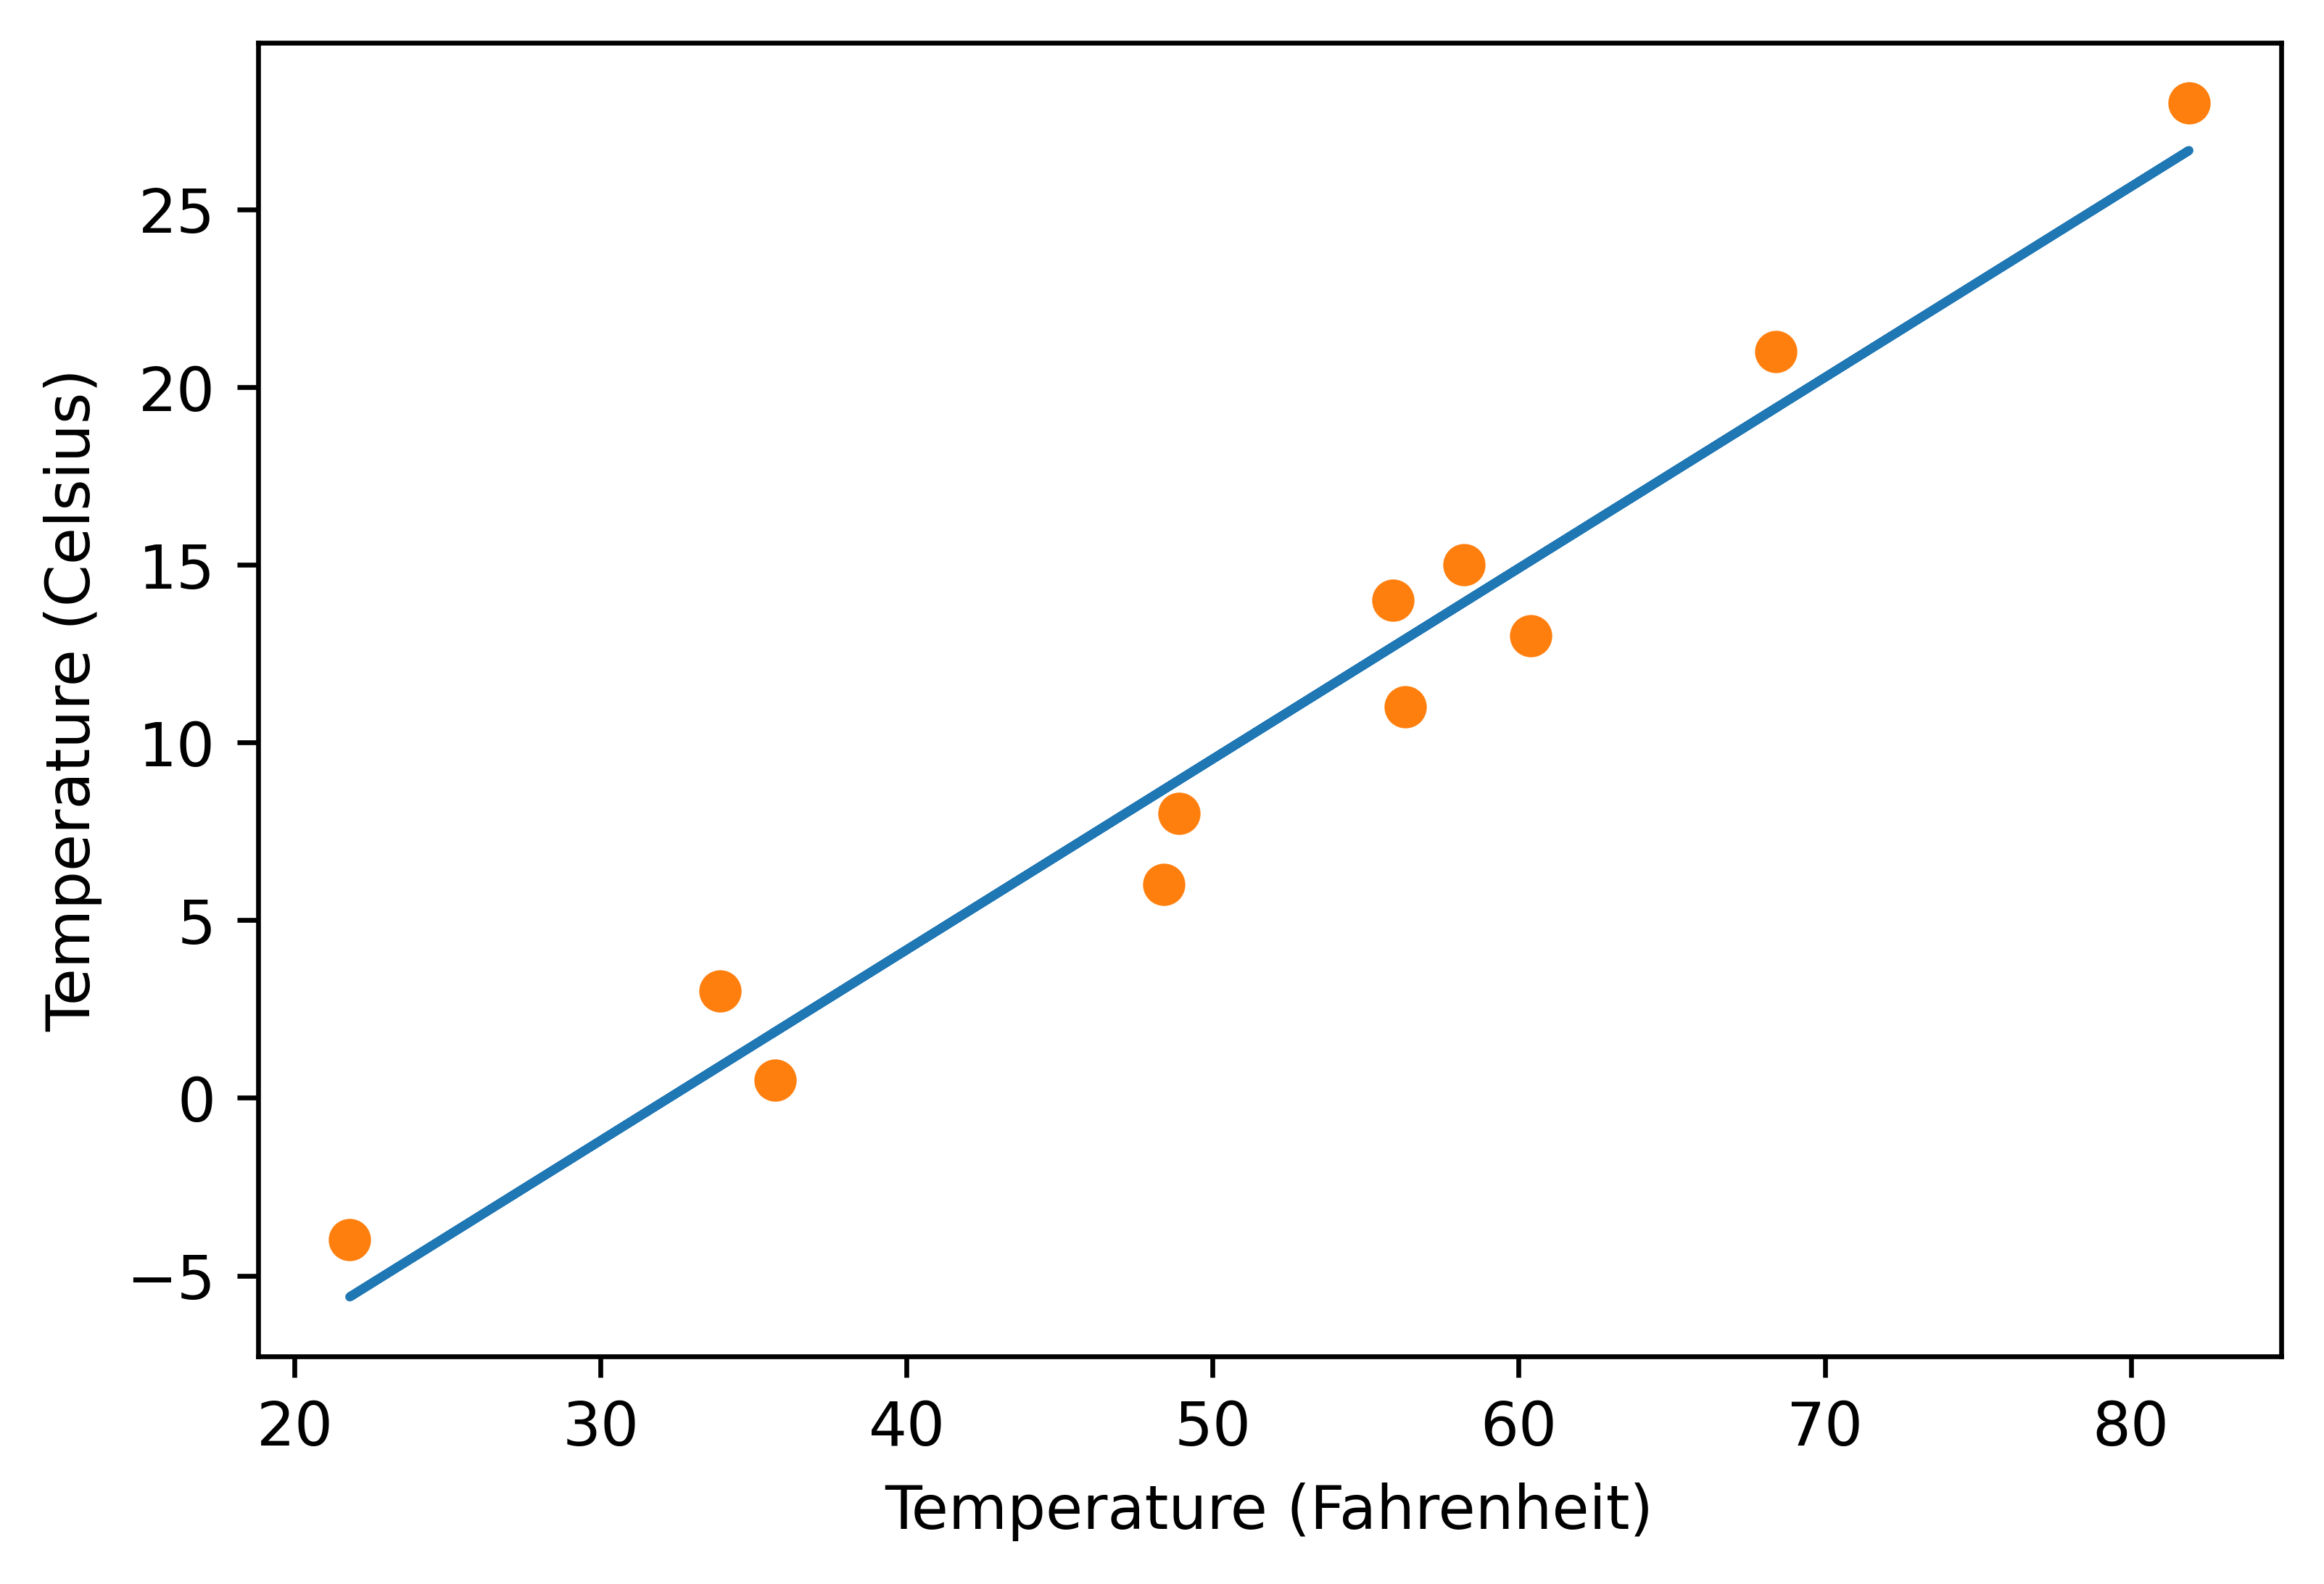

In [34]:
fig = plt.figure(dpi = 600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach() .numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

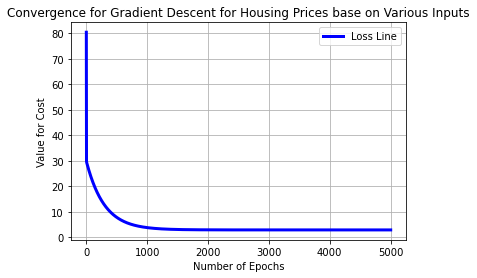

In [35]:
#Plotting the Loss over the Number of Epochs for all X values combined
plt.plot(n_epochs_arr, loss_arr, color='Blue', label='Loss Line', linewidth = 3 )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Value for Cost')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [36]:
#Problem 2 Part a Changing model to a non-linear model

In [37]:
#Recreating the temperature prediction model 
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [38]:
def model(t_u, w1, w2, b):
    equ = w2 * t_u ** 2 + w1 * t_u + b 
    return equ

In [39]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [40]:
w1 = torch.ones(()) #initial W1 is 1
w2 = torch.ones(()) #initial W2 is 1
b = torch.zeros(()) #initial b is 0
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [41]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [42]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w1 + delta, w2 + delta, b), t_c) - 
                         loss_fn(model(t_u, w1 - delta, w2 - delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w

tensor(23510544.)

In [43]:
a = 1e-2     #means 0.01 is the learning rate or the changing rate for our parameters.
w1 = w1 - a * loss_rate_of_change_w
w1

tensor(-235104.4375)

In [44]:
w2 = w2 - a * loss_rate_of_change_w
w2

tensor(-235104.4375)

In [45]:
loss_rate_of_change_b = (loss_fn(model(t_u, w1, w2, b + delta), t_c) - 
                         loss_fn(model(t_u, w1, w2, b - delta), t_c)) / (2.0 * delta)
b = b - a * loss_rate_of_change_b
b

tensor(0.)

In [46]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [47]:
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [48]:
def dmodel_dw2(t_u, w1, w2, b):
    return t_u

In [49]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [50]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [51]:
#Modified training loop to return Epoch and Cost Values to graph
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    loss_arr = []
    n_epochs_arr = []
    
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
        loss_arr.append([loss])
        n_epochs_arr.append([epoch])
        
    return params, loss_arr, n_epochs_arr

In [52]:
#Problem 2 Part b

In [53]:
#Creating the training loop for temperature prediction
#Normalizing the inputs between -1 to 1.
t_un = 0.1 * t_u

#Training with 5000 epochs and learning rate at 1e-1
training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 675.794373
Epoch 2, Loss 1150713.125000
Epoch 3, Loss 1912229376.000000
Epoch 4, Loss 3180625920000.000000
Epoch 5, Loss 5290245973082112.000000
Epoch 6, Loss 8799122176742522880.000000
Epoch 7, Loss 14635340953666459795456.000000
Epoch 8, Loss 24342572510712119391420416.000000
Epoch 9, Loss 40488342408838791954473943040.000000
Epoch 10, Loss 67343169260303412050357244657664.000000
Epoch 11, Loss 112010092308661749785316455683719168.000000
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss inf
Epoch 24, Loss inf
Epoch 25, Loss inf
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, 

(tensor([nan, nan, nan]),
 [[tensor(675.7944)],
  [tensor(1150713.1250)],
  [tensor(1.9122e+09)],
  [tensor(3.1806e+12)],
  [tensor(5.2902e+15)],
  [tensor(8.7991e+18)],
  [tensor(1.4635e+22)],
  [tensor(2.4343e+25)],
  [tensor(4.0488e+28)],
  [tensor(6.7343e+31)],
  [tensor(1.1201e+35)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan)],
  [tensor(nan

In [54]:
#Training with 5000 epochs and learning rate at 1e-2
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 675.794373
Epoch 2, Loss 7072.701172
Epoch 3, Loss 70292.179688
Epoch 4, Loss 713358.250000
Epoch 5, Loss 7195382.500000
Epoch 6, Loss 72719712.000000
Epoch 7, Loss 734488512.000000
Epoch 8, Loss 7419956224.000000
Epoch 9, Loss 74953383936.000000
Epoch 10, Loss 757163163648.000000
Epoch 11, Loss 7648655179776.000000
Epoch 12, Loss 77264792322048.000000
Epoch 13, Loss 780509038772224.000000
Epoch 14, Loss 7884501782888448.000000
Epoch 15, Loss 79647196386951168.000000
Epoch 16, Loss 804575605084389376.000000
Epoch 17, Loss 8127615791043444736.000000
Epoch 18, Loss 82103119297382449152.000000
Epoch 19, Loss 829384877701387517952.000000
Epoch 20, Loss 8378232160281962741760.000000
Epoch 21, Loss 84634751681289246474240.000000
Epoch 22, Loss 854958597458808457396224.000000
Epoch 23, Loss 8636575343262551936860160.000000
Epoch 24, Loss 87244457169047646218747904.000000
Epoch 25, Loss 881321163385489572134649856.000000
Epoch 26, Loss 8902882732536723748516003840.000000
Epoch 27

(tensor([nan, nan, nan]),
 [[tensor(675.7944)],
  [tensor(7072.7012)],
  [tensor(70292.1797)],
  [tensor(713358.2500)],
  [tensor(7195382.5000)],
  [tensor(72719712.)],
  [tensor(7.3449e+08)],
  [tensor(7.4200e+09)],
  [tensor(7.4953e+10)],
  [tensor(7.5716e+11)],
  [tensor(7.6487e+12)],
  [tensor(7.7265e+13)],
  [tensor(7.8051e+14)],
  [tensor(7.8845e+15)],
  [tensor(7.9647e+16)],
  [tensor(8.0458e+17)],
  [tensor(8.1276e+18)],
  [tensor(8.2103e+19)],
  [tensor(8.2938e+20)],
  [tensor(8.3782e+21)],
  [tensor(8.4635e+22)],
  [tensor(8.5496e+23)],
  [tensor(8.6366e+24)],
  [tensor(8.7244e+25)],
  [tensor(8.8132e+26)],
  [tensor(8.9029e+27)],
  [tensor(8.9935e+28)],
  [tensor(9.0850e+29)],
  [tensor(9.1774e+30)],
  [tensor(9.2708e+31)],
  [tensor(9.3651e+32)],
  [tensor(9.4604e+33)],
  [tensor(9.5566e+34)],
  [tensor(9.6539e+35)],
  [tensor(9.7521e+36)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],
  [tensor(inf)],

In [55]:
#Training with 5000 epochs and learning rate at 1e-3
params, loss_arr, n_epochs_arr = training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 675.794373
Epoch 2, Loss 229.416977
Epoch 3, Loss 80.701340
Epoch 4, Loss 31.793343
Epoch 5, Loss 16.086189
Epoch 6, Loss 11.267120
Epoch 7, Loss 9.926227
Epoch 8, Loss 9.640760
Epoch 9, Loss 9.641191
Epoch 10, Loss 9.696720
Epoch 11, Loss 9.746609
Epoch 12, Loss 9.780423
Epoch 13, Loss 9.800562
Epoch 14, Loss 9.811265
Epoch 15, Loss 9.815983
Epoch 16, Loss 9.817051
Epoch 17, Loss 9.815939
Epoch 18, Loss 9.813540
Epoch 19, Loss 9.810383
Epoch 20, Loss 9.806787
Epoch 21, Loss 9.802934
Epoch 22, Loss 9.798934
Epoch 23, Loss 9.794848
Epoch 24, Loss 9.790711
Epoch 25, Loss 9.786548
Epoch 26, Loss 9.782373
Epoch 27, Loss 9.778189
Epoch 28, Loss 9.774001
Epoch 29, Loss 9.769810
Epoch 30, Loss 9.765622
Epoch 31, Loss 9.761433
Epoch 32, Loss 9.757249
Epoch 33, Loss 9.753065
Epoch 34, Loss 9.748879
Epoch 35, Loss 9.744701
Epoch 36, Loss 9.740520
Epoch 37, Loss 9.736349
Epoch 38, Loss 9.732174
Epoch 39, Loss 9.728004
Epoch 40, Loss 9.723838
Epoch 41, Loss 9.719671
Epoch 42, Loss 9.

In [56]:
#Training with 5000 epochs and learning rate at 1e-4
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 675.794373
Epoch 2, Loss 620.295959
Epoch 3, Loss 569.380798
Epoch 4, Loss 522.672058
Epoch 5, Loss 479.823914
Epoch 6, Loss 440.518829
Epoch 7, Loss 404.465515
Epoch 8, Loss 371.396210
Epoch 9, Loss 341.065399
Epoch 10, Loss 313.247681
Epoch 11, Loss 287.736115
Epoch 12, Loss 264.340637
Epoch 13, Loss 242.887100
Epoch 14, Loss 223.215317
Epoch 15, Loss 205.178360
Epoch 16, Loss 188.641556
Epoch 17, Loss 173.481049
Epoch 18, Loss 159.583267
Epoch 19, Loss 146.843979
Epoch 20, Loss 135.167450
Epoch 21, Loss 124.465889
Epoch 22, Loss 114.658760
Epoch 23, Loss 105.672043
Epoch 24, Loss 97.437843
Epoch 25, Loss 89.893944
Epoch 26, Loss 82.983078
Epoch 27, Loss 76.652832
Epoch 28, Loss 70.855072
Epoch 29, Loss 65.545586
Epoch 30, Loss 60.683895
Epoch 31, Loss 56.232750
Epoch 32, Loss 52.158024
Epoch 33, Loss 48.428452
Epoch 34, Loss 45.015255
Epoch 35, Loss 41.892082
Epoch 36, Loss 39.034767
Epoch 37, Loss 36.421124
Epoch 38, Loss 34.030796
Epoch 39, Loss 31.845110
Epoch 40, L

(tensor([ 0.3497,  0.3497, -0.8786]),
 [[tensor(675.7944)],
  [tensor(620.2960)],
  [tensor(569.3808)],
  [tensor(522.6721)],
  [tensor(479.8239)],
  [tensor(440.5188)],
  [tensor(404.4655)],
  [tensor(371.3962)],
  [tensor(341.0654)],
  [tensor(313.2477)],
  [tensor(287.7361)],
  [tensor(264.3406)],
  [tensor(242.8871)],
  [tensor(223.2153)],
  [tensor(205.1784)],
  [tensor(188.6416)],
  [tensor(173.4810)],
  [tensor(159.5833)],
  [tensor(146.8440)],
  [tensor(135.1674)],
  [tensor(124.4659)],
  [tensor(114.6588)],
  [tensor(105.6720)],
  [tensor(97.4378)],
  [tensor(89.8939)],
  [tensor(82.9831)],
  [tensor(76.6528)],
  [tensor(70.8551)],
  [tensor(65.5456)],
  [tensor(60.6839)],
  [tensor(56.2327)],
  [tensor(52.1580)],
  [tensor(48.4285)],
  [tensor(45.0153)],
  [tensor(41.8921)],
  [tensor(39.0348)],
  [tensor(36.4211)],
  [tensor(34.0308)],
  [tensor(31.8451)],
  [tensor(29.8469)],
  [tensor(28.0206)],
  [tensor(26.3517)],
  [tensor(24.8269)],
  [tensor(23.4342)],
  [tensor(22.16

In [57]:
t_p = model(t_un, *params)

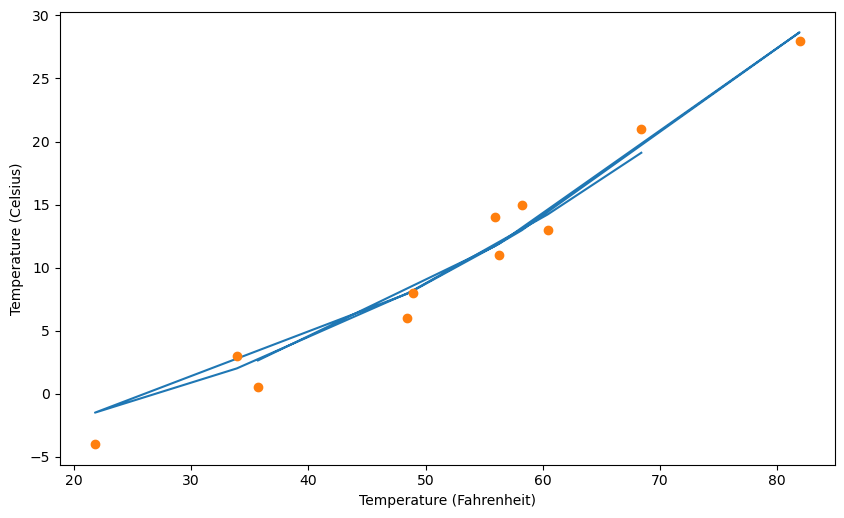

In [58]:
fig = plt.figure(dpi = 100)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach() .numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

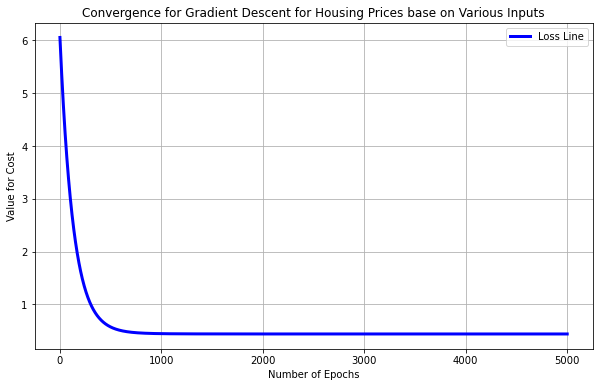

In [97]:
#Plotting the Loss over the Number of Epochs for all X values combined
plt.plot(n_epochs_arr, loss_arr, color='Blue', label='Loss Line', linewidth = 3 )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Value for Cost')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()

In [60]:
#Problem 3 Developing model to predict housing prices

In [61]:
#Problem 3 part a Setting up model and parameters

In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

In [63]:
dataset = pd.DataFrame(pd.read_csv('Housing.csv'))
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
m = len(dataset)
m

545

In [65]:
dataset.shape

(545, 13)

In [66]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = dataset[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [67]:
Newtrain.values[:, 0]

array([ 7420,  8960,  9960,  7500,  7420,  7500,  8580, 16200,  8100,
        5750, 13200,  6000,  6550,  3500,  7800,  6000,  6600,  8500,
        4600,  6420,  4320,  7155,  8050,  4560,  8800,  6540,  6000,
        8875,  7950,  5500,  7475,  7000,  4880,  5960,  6840,  7000,
        7482,  9000,  6000,  6000,  6550,  6360,  6480,  6000,  6000,
        6000,  6000,  6600,  4300,  7440,  7440,  6325,  6000,  5150,
        6000,  6000, 11440,  9000,  7680,  6000,  6000,  8880,  6240,
        6360, 11175,  8880, 13200,  7700,  6000, 12090,  4000,  6000,
        5020,  6600,  4040,  4260,  6420,  6500,  5700,  6000,  6000,
        4000, 10500,  6000,  3760,  8250,  6670,  3960,  7410,  8580,
        5000,  6750,  4800,  7200,  6000,  4100,  9000,  6400,  6600,
        6000,  6600,  5500,  5500,  6350,  5500,  4500,  5450,  6420,
        3240,  6615,  6600,  8372,  4300,  9620,  6800,  8000,  6900,
        3700,  6420,  7020,  6540,  7231,  6254,  7320,  6525, 15600,
        7160,  6500,

In [68]:
area_t_u = torch.tensor(Newtrain.values[:, 0])
bedrooms_t_u = torch.tensor(Newtrain.values[:, 1])
bathrooms_t_u = torch.tensor(Newtrain.values[:, 2])
stories_t_u = torch.tensor(Newtrain.values[:, 3])
parking_t_u = torch.tensor(Newtrain.values[:, 4])

#Predicting the housing prices
price_t_c = torch.tensor(Newtrain.values[:, 5])

In [69]:
def model(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    equ = w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + b 
    return equ

In [70]:
x1 = area_t_u
x2 = bedrooms_t_u
x3 = bathrooms_t_u 
x4 = stories_t_u 
x5 = parking_t_u 

In [71]:
#All below needs work

In [72]:
def loss_fn(t_p, price_t_c):
    squared_diffs = (t_p - price_t_c)**2
    return squared_diffs.mean()

In [73]:
w1 = torch.ones(()) #initial W is 1
w2 = torch.ones(()) #initial W is 1
w3 = torch.ones(()) #initial W is 1
w4 = torch.ones(()) #initial W is 1
w5 = torch.ones(()) #initial W is 1
b = torch.zeros(()) #initial b is 0
t_p = model(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
t_p

tensor([ 7431.,  8975.,  9969.,  7511.,  7429.,  7509.,  8593., 16210.,  8109.,
         5760., 13208.,  6011.,  6559.,  3510.,  7807.,  6009.,  6609.,  8511.,
         4609.,  6428.,  4328.,  7163.,  8056.,  4568.,  8809.,  6550.,  6009.,
         8881.,  7961.,  5509.,  7486.,  7010.,  4889.,  5969.,  6849.,  7011.,
         7491.,  9012.,  6010.,  6011.,  6556.,  6369.,  6491.,  6012.,  6011.,
         6008.,  6010.,  6611.,  4308.,  7446.,  7450.,  6334.,  6011.,  5161.,
         6008.,  6007., 11448.,  9011.,  7691.,  6010.,  6008.,  8885.,  6249.,
         6371., 11181.,  8888., 13205.,  7708.,  6006., 12100.,  4007.,  6010.,
         5028.,  6608.,  4047.,  4268.,  6428.,  6508.,  5707.,  6008.,  6007.,
         4008., 10507.,  6009.,  3768.,  8258.,  6677.,  3967.,  7417.,  8592.,
         5006.,  6756.,  4809.,  7209.,  6011.,  4110.,  9006.,  6406.,  6608.,
         6008.,  6606.,  5508.,  5510.,  6358.,  5508.,  4508.,  5457.,  6427.,
         3249.,  6624.,  6607.,  8381., 

In [74]:
loss = loss_fn(t_p, price_t_c)
loss

tensor(2.6160e+13)

In [75]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(w1 + delta, w2 + delta, w3 + delta, w4+ delta, w5+ delta, x1, x2, x3, x4, x5, b), price_t_c) - 
                         loss_fn(model(w1 - delta, w2 - delta, w3 - delta, w4 - delta, w5 - delta, x1, x2, x3, x4, x5, b), price_t_c)) / (2.0 * delta)
loss_rate_of_change_w 

tensor(-5.3456e+10)

In [76]:
a = 1e-2     #means 0.01 is the learning rate or the changing rate for our parameters.
w = w - a * loss_rate_of_change_w
w

tensor(5.3456e+08)

In [77]:
loss_rate_of_change_b = (loss_fn(model(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b + delta), price_t_c) - loss_fn(model(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b - delta), price_t_c)) / (2.0 * delta)
b = b - a * loss_rate_of_change_b
b

tensor(0.)

In [78]:
def dloss_fn(t_p, price_t_c):
    dsq_diffs = 2 * (t_p - price_t_c) / t_p.size(0)
    return dsq_diffs

In [79]:
def dmodel_dw_w1(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return x1

In [80]:
def dmodel_dw_w2(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return x2

In [81]:
def dmodel_dw_w3(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return x3

In [82]:
def dmodel_dw_w4(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return x4

In [83]:
def dmodel_dw_w5(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return x5

In [84]:
def dmodel_db(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    return 1.0

In [85]:
def grad_fn(price_t_c, t_p, w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b):
    dloss_dtp = dloss_fn(t_p, price_t_c)
    dloss_dw_w1 = dloss_dtp * dmodel_dw_w1(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    dloss_dw_w2 = dloss_dtp * dmodel_dw_w2(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    dloss_dw_w3 = dloss_dtp * dmodel_dw_w3(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    dloss_dw_w4 = dloss_dtp * dmodel_dw_w4(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    dloss_dw_w5 = dloss_dtp * dmodel_dw_w5(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    dloss_db = dloss_dtp * dmodel_db(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
    return torch.stack([dloss_dw_w1.sum(), dloss_dw_w2.sum(), dloss_dw_w3.sum(), dloss_dw_w4.sum(), dloss_dw_w5.sum(), dloss_db.sum()])

In [86]:
#Modified training loop to return Epoch and Cost Values to graph
def training_loop(n_epochs, learning_rate, params, x1, x2, x3, x4, x5, price_t_c):
    loss_arr = []
    n_epochs_arr = []
    
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params
        
        t_p = model(w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
        loss = loss_fn(t_p, price_t_c)
        grad = grad_fn(price_t_c, t_p, w1, w2, w3, w4, w5, x1, x2, x3, x4, x5, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
        loss_arr.append([loss])
        n_epochs_arr.append([epoch])
        
    return params, loss_arr, n_epochs_arr

In [87]:
x2

tensor([4, 4, 3, 4, 4, 3, 4, 5, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3,
        3, 4, 3, 3, 5, 4, 3, 3, 4, 3, 5, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3,
        3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3, 2, 4, 4, 3, 3, 2, 3, 3, 4, 3, 4,
        3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 2, 3, 3, 4, 3,
        3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 6, 3, 2, 3, 3, 4, 3, 3,
        3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 5,
        4, 3, 2, 3, 3, 4, 3, 4, 5, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2,
        4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 2, 2, 4, 3,
        3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3,
        3, 3, 2, 3, 4, 4, 2, 3, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 4, 3,
        3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3,
        2, 3, 3, 3, 4, 3, 3, 5, 3, 4, 4, 2, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3, 3, 3,
        3, 2, 4, 3, 4, 2, 4, 3, 3, 3, 3,

In [88]:
#Using Standard Scalar build in API to better train the neural network model
#Changed the explanatory values within a mean of 0.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#define standard scalar
scalar = StandardScaler()
#scalar = MinMaxScaler()

#Scaling from Newtrain[num_vars]
x1_un = scalar.fit_transform(Newtrain[['area']])
x2_un = scalar.fit_transform(Newtrain[['bedrooms']])
x3_un = scalar.fit_transform(Newtrain[['bathrooms']])
x4_un = scalar.fit_transform(Newtrain[['stories']])
x5_un = scalar.fit_transform(Newtrain[['parking']])
price_t_c_un = scalar.fit_transform(Newtrain[['price']])

x1_un = torch.tensor(x1_un)
x2_un = torch.tensor(x2_un)
x3_un = torch.tensor(x3_un)
x4_un = torch.tensor(x4_un)
x5_un = torch.tensor(x5_un)
price_t_c_un = torch.tensor(price_t_c_un)

In [89]:
x1_un_torch = torch.reshape(x1_un, (-1,))
x2_un_torch = torch.reshape(x2_un, (-1,))  
x3_un_torch = torch.reshape(x3_un, (-1,))  
x4_un_torch = torch.reshape(x4_un, (-1,))  
x5_un_torch = torch.reshape(x5_un, (-1,))
price_t_c_torch = torch.reshape(price_t_c_un, (-1,))

x2_un_torch

tensor([ 1.4034,  1.4034,  0.0473,  1.4034,  1.4034,  0.0473,  1.4034,  2.7596,
         1.4034,  0.0473,  0.0473,  1.4034,  1.4034,  1.4034,  0.0473,  1.4034,
         1.4034,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,
         0.0473,  1.4034,  0.0473,  0.0473,  2.7596,  1.4034,  0.0473,  0.0473,
         1.4034,  0.0473,  2.7596,  0.0473,  0.0473,  1.4034,  0.0473,  1.4034,
         0.0473,  0.0473,  0.0473,  1.4034,  1.4034,  0.0473,  0.0473,  0.0473,
         0.0473,  0.0473,  0.0473,  0.0473,  1.4034,  0.0473,  0.0473,  0.0473,
         1.4034,  1.4034,  1.4034,  0.0473,  0.0473, -1.3089,  1.4034,  1.4034,
         0.0473,  0.0473, -1.3089,  0.0473,  0.0473,  1.4034,  0.0473,  1.4034,
         0.0473, -1.3089,  0.0473,  1.4034,  0.0473,  0.0473,  0.0473,  0.0473,
         0.0473,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,  0.0473,
         0.0473,  2.7596,  0.0473, -1.3089,  0.0473,  0.0473,  1.4034,  0.0473,
         0.0473,  0.0473,  0.0473,  1.40

In [90]:
#Doing the training loop for different learning rates

#Normalizing the inputs between -1 to 1.
#x1_un = 0.1 * x1
#x2_un = 0.1 * x2
#x3_un = 0.1 * x3
#x4_un = 0.1 * x4
#x5_un = 0.1 * x5

#Learning rate is at 1e-1 with 5000 epochs
training_loop(
n_epochs = 5000,
learning_rate = 1e-1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x1 = x1_un_torch,
x2 = x2_un_torch,
x3 = x3_un_torch,
x4 = x4_un_torch,
x5 = x5_un_torch,
price_t_c = price_t_c_torch)

Epoch 1, Loss 6.056968
Epoch 2, Loss 2.586198
Epoch 3, Loss 1.267067
Epoch 4, Loss 0.763577
Epoch 5, Loss 0.569912
Epoch 6, Loss 0.494366
Epoch 7, Loss 0.464148
Epoch 8, Loss 0.451530
Epoch 9, Loss 0.445892
Epoch 10, Loss 0.443124
Epoch 11, Loss 0.441607
Epoch 12, Loss 0.440684
Epoch 13, Loss 0.440074
Epoch 14, Loss 0.439647
Epoch 15, Loss 0.439339
Epoch 16, Loss 0.439111
Epoch 17, Loss 0.438941
Epoch 18, Loss 0.438814
Epoch 19, Loss 0.438718
Epoch 20, Loss 0.438645
Epoch 21, Loss 0.438590
Epoch 22, Loss 0.438549
Epoch 23, Loss 0.438517
Epoch 24, Loss 0.438493
Epoch 25, Loss 0.438475
Epoch 26, Loss 0.438461
Epoch 27, Loss 0.438451
Epoch 28, Loss 0.438443
Epoch 29, Loss 0.438437
Epoch 30, Loss 0.438432
Epoch 31, Loss 0.438429
Epoch 32, Loss 0.438426
Epoch 33, Loss 0.438424
Epoch 34, Loss 0.438422
Epoch 35, Loss 0.438421
Epoch 36, Loss 0.438420
Epoch 37, Loss 0.438420
Epoch 38, Loss 0.438419
Epoch 39, Loss 0.438419
Epoch 40, Loss 0.438418
Epoch 41, Loss 0.438418
Epoch 42, Loss 0.438418
E

(tensor([3.8417e-01, 6.6217e-02, 3.0456e-01, 2.5413e-01, 1.7393e-01, 2.9143e-16],
        dtype=torch.float64),
 [[tensor(6.0570, dtype=torch.float64)],
  [tensor(2.5862, dtype=torch.float64)],
  [tensor(1.2671, dtype=torch.float64)],
  [tensor(0.7636, dtype=torch.float64)],
  [tensor(0.5699, dtype=torch.float64)],
  [tensor(0.4944, dtype=torch.float64)],
  [tensor(0.4641, dtype=torch.float64)],
  [tensor(0.4515, dtype=torch.float64)],
  [tensor(0.4459, dtype=torch.float64)],
  [tensor(0.4431, dtype=torch.float64)],
  [tensor(0.4416, dtype=torch.float64)],
  [tensor(0.4407, dtype=torch.float64)],
  [tensor(0.4401, dtype=torch.float64)],
  [tensor(0.4396, dtype=torch.float64)],
  [tensor(0.4393, dtype=torch.float64)],
  [tensor(0.4391, dtype=torch.float64)],
  [tensor(0.4389, dtype=torch.float64)],
  [tensor(0.4388, dtype=torch.float64)],
  [tensor(0.4387, dtype=torch.float64)],
  [tensor(0.4386, dtype=torch.float64)],
  [tensor(0.4386, dtype=torch.float64)],
  [tensor(0.4385, dtype=tor

In [91]:
#Learning rate is at 1e-2 with 5000 epochs
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x1 = x1_un_torch,
x2 = x2_un_torch,
x3 = x3_un_torch,
x4 = x4_un_torch,
x5 = x5_un_torch,
price_t_c = price_t_c_torch)

Epoch 1, Loss 6.056968
Epoch 2, Loss 5.635688
Epoch 3, Loss 5.246132
Epoch 4, Loss 4.885905
Epoch 5, Loss 4.552796
Epoch 6, Loss 4.244759
Epoch 7, Loss 3.959904
Epoch 8, Loss 3.696482
Epoch 9, Loss 3.452877
Epoch 10, Loss 3.227594
Epoch 11, Loss 3.019253
Epoch 12, Loss 2.826577
Epoch 13, Loss 2.648384
Epoch 14, Loss 2.483582
Epoch 15, Loss 2.331163
Epoch 16, Loss 2.190193
Epoch 17, Loss 2.059810
Epoch 18, Loss 1.939216
Epoch 19, Loss 1.827673
Epoch 20, Loss 1.724500
Epoch 21, Loss 1.629067
Epoch 22, Loss 1.540789
Epoch 23, Loss 1.459130
Epoch 24, Loss 1.383589
Epoch 25, Loss 1.313708
Epoch 26, Loss 1.249059
Epoch 27, Loss 1.189249
Epoch 28, Loss 1.133914
Epoch 29, Loss 1.082718
Epoch 30, Loss 1.035348
Epoch 31, Loss 0.991518
Epoch 32, Loss 0.950961
Epoch 33, Loss 0.913431
Epoch 34, Loss 0.878701
Epoch 35, Loss 0.846560
Epoch 36, Loss 0.816814
Epoch 37, Loss 0.789282
Epoch 38, Loss 0.763800
Epoch 39, Loss 0.740212
Epoch 40, Loss 0.718377
Epoch 41, Loss 0.698163
Epoch 42, Loss 0.679449
E

(tensor([3.8417e-01, 6.6217e-02, 3.0456e-01, 2.5413e-01, 1.7393e-01, 3.3296e-16],
        dtype=torch.float64),
 [[tensor(6.0570, dtype=torch.float64)],
  [tensor(5.6357, dtype=torch.float64)],
  [tensor(5.2461, dtype=torch.float64)],
  [tensor(4.8859, dtype=torch.float64)],
  [tensor(4.5528, dtype=torch.float64)],
  [tensor(4.2448, dtype=torch.float64)],
  [tensor(3.9599, dtype=torch.float64)],
  [tensor(3.6965, dtype=torch.float64)],
  [tensor(3.4529, dtype=torch.float64)],
  [tensor(3.2276, dtype=torch.float64)],
  [tensor(3.0193, dtype=torch.float64)],
  [tensor(2.8266, dtype=torch.float64)],
  [tensor(2.6484, dtype=torch.float64)],
  [tensor(2.4836, dtype=torch.float64)],
  [tensor(2.3312, dtype=torch.float64)],
  [tensor(2.1902, dtype=torch.float64)],
  [tensor(2.0598, dtype=torch.float64)],
  [tensor(1.9392, dtype=torch.float64)],
  [tensor(1.8277, dtype=torch.float64)],
  [tensor(1.7245, dtype=torch.float64)],
  [tensor(1.6291, dtype=torch.float64)],
  [tensor(1.5408, dtype=tor

In [92]:
#Learning rate is at 1e-3 with 5000 epochs
params, loss_arr, n_epochs_arr = training_loop(
n_epochs = 5000,
learning_rate = 1e-3,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x1 = x1_un_torch,
x2 = x2_un_torch,
x3 = x3_un_torch,
x4 = x4_un_torch,
x5 = x5_un_torch,
price_t_c = price_t_c_torch)

Epoch 1, Loss 6.056968
Epoch 2, Loss 6.014098
Epoch 3, Loss 5.971556
Epoch 4, Loss 5.929341
Epoch 5, Loss 5.887449
Epoch 6, Loss 5.845878
Epoch 7, Loss 5.804626
Epoch 8, Loss 5.763689
Epoch 9, Loss 5.723067
Epoch 10, Loss 5.682755
Epoch 11, Loss 5.642753
Epoch 12, Loss 5.603057
Epoch 13, Loss 5.563665
Epoch 14, Loss 5.524575
Epoch 15, Loss 5.485785
Epoch 16, Loss 5.447292
Epoch 17, Loss 5.409093
Epoch 18, Loss 5.371188
Epoch 19, Loss 5.333572
Epoch 20, Loss 5.296245
Epoch 21, Loss 5.259204
Epoch 22, Loss 5.222447
Epoch 23, Loss 5.185971
Epoch 24, Loss 5.149775
Epoch 25, Loss 5.113856
Epoch 26, Loss 5.078212
Epoch 27, Loss 5.042841
Epoch 28, Loss 5.007742
Epoch 29, Loss 4.972911
Epoch 30, Loss 4.938347
Epoch 31, Loss 4.904047
Epoch 32, Loss 4.870011
Epoch 33, Loss 4.836235
Epoch 34, Loss 4.802718
Epoch 35, Loss 4.769457
Epoch 36, Loss 4.736451
Epoch 37, Loss 4.703699
Epoch 38, Loss 4.671197
Epoch 39, Loss 4.638943
Epoch 40, Loss 4.606937
Epoch 41, Loss 4.575176
Epoch 42, Loss 4.543659
E

In [93]:
#Learning rate is at 1e-3 with 5000 epochs
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
x1 = x1_un_torch,
x2 = x2_un_torch,
x3 = x3_un_torch,
x4 = x4_un_torch,
x5 = x5_un_torch,
price_t_c = price_t_c_torch)
#print_params = False)
params

Epoch 1, Loss 6.056968
Epoch 2, Loss 6.052673
Epoch 3, Loss 6.048382
Epoch 4, Loss 6.044094
Epoch 5, Loss 6.039810
Epoch 6, Loss 6.035528
Epoch 7, Loss 6.031251
Epoch 8, Loss 6.026976
Epoch 9, Loss 6.022704
Epoch 10, Loss 6.018436
Epoch 11, Loss 6.014172
Epoch 12, Loss 6.009910
Epoch 13, Loss 6.005652
Epoch 14, Loss 6.001397
Epoch 15, Loss 5.997145
Epoch 16, Loss 5.992896
Epoch 17, Loss 5.988651
Epoch 18, Loss 5.984409
Epoch 19, Loss 5.980170
Epoch 20, Loss 5.975935
Epoch 21, Loss 5.971703
Epoch 22, Loss 5.967474
Epoch 23, Loss 5.963248
Epoch 24, Loss 5.959026
Epoch 25, Loss 5.954806
Epoch 26, Loss 5.950590
Epoch 27, Loss 5.946378
Epoch 28, Loss 5.942168
Epoch 29, Loss 5.937962
Epoch 30, Loss 5.933759
Epoch 31, Loss 5.929559
Epoch 32, Loss 5.925362
Epoch 33, Loss 5.921169
Epoch 34, Loss 5.916979
Epoch 35, Loss 5.912792
Epoch 36, Loss 5.908608
Epoch 37, Loss 5.904428
Epoch 38, Loss 5.900250
Epoch 39, Loss 5.896076
Epoch 40, Loss 5.891905
Epoch 41, Loss 5.887738
Epoch 42, Loss 5.883573
E

tensor([3.8400e-01, 6.6424e-02, 3.0432e-01, 2.5415e-01, 1.7414e-01, 3.0526e-16],
       dtype=torch.float64)

In [94]:
loss_arr

[[tensor(6.0570, dtype=torch.float64)],
 [tensor(6.0141, dtype=torch.float64)],
 [tensor(5.9716, dtype=torch.float64)],
 [tensor(5.9293, dtype=torch.float64)],
 [tensor(5.8874, dtype=torch.float64)],
 [tensor(5.8459, dtype=torch.float64)],
 [tensor(5.8046, dtype=torch.float64)],
 [tensor(5.7637, dtype=torch.float64)],
 [tensor(5.7231, dtype=torch.float64)],
 [tensor(5.6828, dtype=torch.float64)],
 [tensor(5.6428, dtype=torch.float64)],
 [tensor(5.6031, dtype=torch.float64)],
 [tensor(5.5637, dtype=torch.float64)],
 [tensor(5.5246, dtype=torch.float64)],
 [tensor(5.4858, dtype=torch.float64)],
 [tensor(5.4473, dtype=torch.float64)],
 [tensor(5.4091, dtype=torch.float64)],
 [tensor(5.3712, dtype=torch.float64)],
 [tensor(5.3336, dtype=torch.float64)],
 [tensor(5.2962, dtype=torch.float64)],
 [tensor(5.2592, dtype=torch.float64)],
 [tensor(5.2224, dtype=torch.float64)],
 [tensor(5.1860, dtype=torch.float64)],
 [tensor(5.1498, dtype=torch.float64)],
 [tensor(5.1139, dtype=torch.float64)],


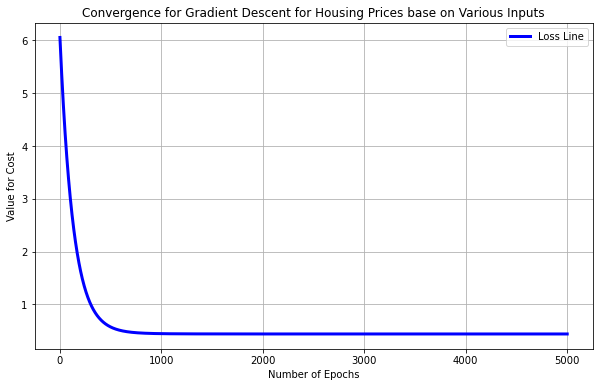

In [95]:
#Plotting the Loss over the Number of Epochs for all X values combined
plt.plot(n_epochs_arr, loss_arr, color='Blue', label='Loss Line', linewidth = 3 )
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of Epochs')
plt.ylabel('Value for Cost')
plt.title('Convergence for Gradient Descent for Housing Prices base on Various Inputs')
plt.legend()
plt.show()